In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pylab import rcParams

#path = '/kaggle'
#path = '/tmp/working/' # Standard kaggle container data path
path = '/tmp/working/tmp/kaggle-gearbox-analysis/data' # "./"
input_path = path + '/input/gearbox-fault-diagnosis-elaborated-datasets/stdev/'
broken_dataset  = "broken30hz_stdev_100.csv"
healthy_dataset = "healthy30hz_stdev_100.csv"

# Exploring the dataset

In [20]:
healthyDataset = pd.read_csv(input_path + healthy_dataset)
brokenDataset = pd.read_csv(input_path + broken_dataset)

## Join healthy & broken datasets in a single dataframe

In [21]:
dataset = pd.concat([healthyDataset, brokenDataset], axis=0)
dataset.describe()

,a1,a2,a3,a4,load,failure
count,20203.000000,20203.000000,20203.000000,20203.000000,20203.000000,20203.000000
mean,5.766842,4.266330,3.847555,4.276706,45.644706,0.497401
std,2.219236,1.162870,1.020591,1.228792,28.660383,0.500006
min,1.468928,1.272738,0.990336,1.111679,0.000000,0.000000
25%,4.164285,3.473209,3.118392,3.409206,20.000000,0.000000
50%,5.337988,4.146414,3.779156,4.211713,50.000000,0.000000
75%,7.003621,4.903647,4.521386,5.078614,70.000000,1.000000
max,23.909199,10.984053,8.273939,10.609798,90.000000,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

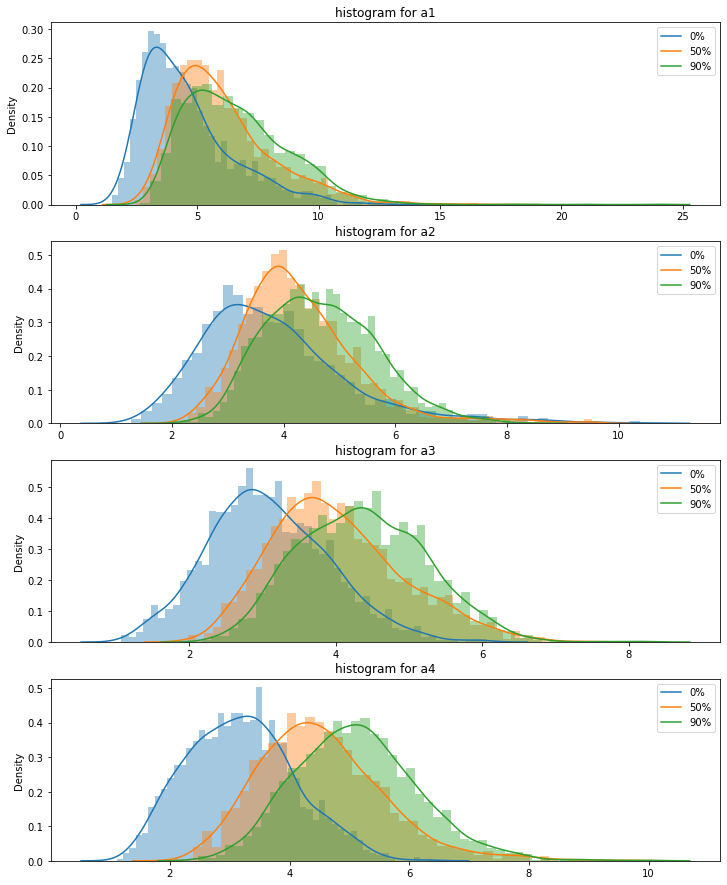

In [22]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[['a1','a2','a3','a4']]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[cn][dataset.load == 0], bins=50)
    sns.distplot(dataset[cn][dataset.load == 50], bins=50)
    sns.distplot(dataset[cn][dataset.load == 90], bins=50)
    ax.set_xlabel('')
    plt.legend(['0%', '50%', '90%'])
    ax.set_title('histogram for ' + str(cn) + ': healthy & broken')
    ax.set_title('histogram for ' + str(cn))
plt.show()

## Correlation matrix

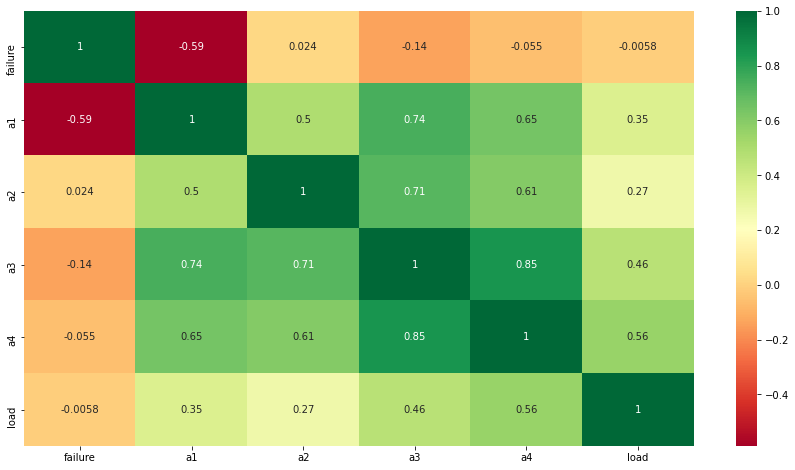

In [23]:
rcParams['figure.figsize'] = 15, 8
columns = ['failure','a1', 'a2', 'a3', 'a4', 'load']
sns.heatmap(dataset[columns].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

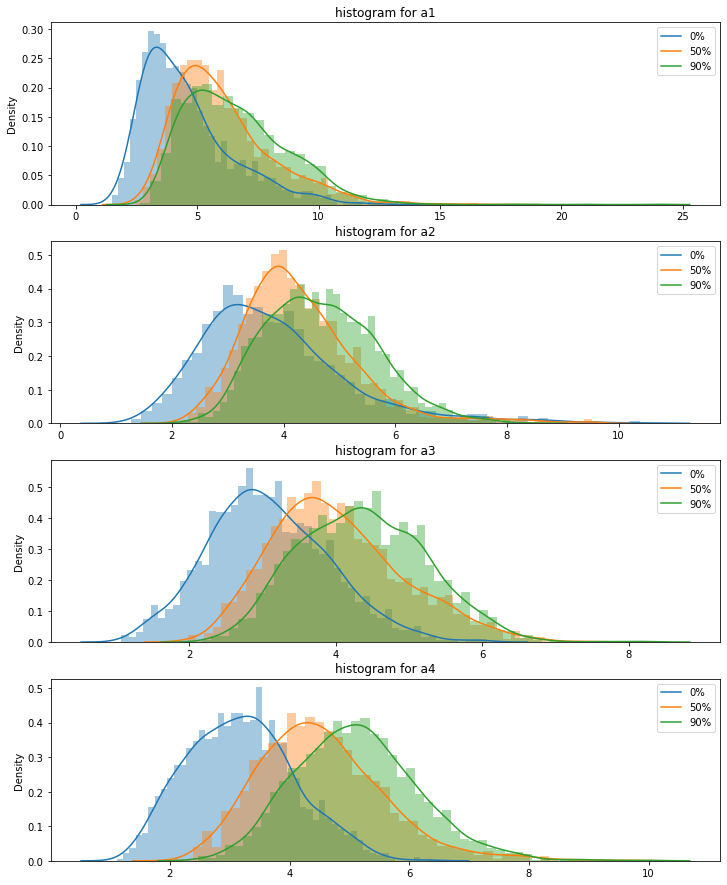

In [24]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[['a1','a2','a3','a4']]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[cn][dataset.load == 0], bins=50)
    sns.distplot(dataset[cn][dataset.load == 50], bins=50)
    sns.distplot(dataset[cn][dataset.load == 90], bins=50)
    ax.set_xlabel('')
    plt.legend(['0%', '50%', '90%'])
    ax.set_title('histogram for ' + str(cn) + ': healthy & broken')
    ax.set_title('histogram for ' + str(cn))
plt.show()

# Logistic regression

In [25]:
# Predictor variable (features)
columns = ['a1', 'a2', 'a3', 'a4']
#columns = ['a4']
X = healthyDataset[columns]
# Target variable: Load
y = healthyDataset[['load']]

In [60]:
# Split the dataset: 80% train, 20% test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Train and prediction

In [63]:
# Logistic regression classifier
from sklearn.linear_model import LinearRegression

# Setup the model
regressor = LinearRegression()

LinearRegression()

In [70]:
# Train the model
regressor_trained = regressor.fit(X_train, y_train)

print("Ordenada en el origen=", regressor.intercept_)
print("Pendiente de la recta para cada predictor (a1,a2,a3,a4) =", regressor.coef_[0,:])
print("\n Actual load for the test data (first 10 rows):", np.array(y_test)[:,0][:10] )

# Predict Failure for the test set
y_pred = regressor.predict(X_test)
print("\n Prediction for the test data (first 10 rows):", y_pred[:,0][:10])

Ordenada en el origen= [-8.96433088]
Pendiente de la recta para cada predictor (a1,a2,a3,a4) = [-5.87141676 -5.11489396 15.24913858 13.11305588]

 Actual load for the test data (first 10 rows): [40.  0. 70. 80. 30. 50. 30. 60. 80. 70.]

 Prediction for the test data (first 10 rows): [54.53633064 23.96654499 43.17245089 48.07185381 19.89595566 48.86033565
 40.18794386 52.46088793 48.31250229 84.13368364]


## Evaluate the model

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[-5.87141676 -5.11489396 15.24913858 13.11305588]]
Mean squared error: 524.62
Coefficient of determination: 0.34


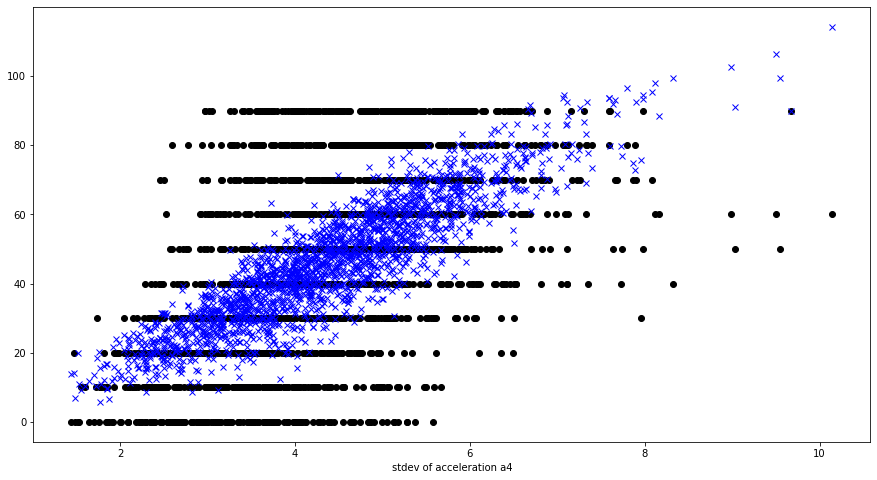

In [59]:
# Plot outputs: take X axis as the best stdev predictor (a4, see correlation matrix)
plt.plot(X_test['a4'], y_test, 'o', color='black');
plt.plot(X_test['a4'], y_pred, 'x', color='blue', linewidth=3)
plt.xlabel('stdev of acceleration a4')

plt.show()